Inserting all necessary packages needed for this step

In [69]:
from utils import reshape_loaded_ds
from pathlib import Path
from movement.io import load_poses

Defining the file path for the data

In [70]:
data_folder = Path(r"C:\Users\Yousuf\Desktop\Project\Data")
print(data_folder)

C:\Users\Yousuf\Desktop\Project\Data


In [71]:
female_1_name = "220719_SB019_FM001_female1_2022-07-19-164002DLC_resnet50_shanice_allNov29shuffle1_196000_filtered.csv"
female_1_path = data_folder / female_1_name
print(female_1_path)

C:\Users\Yousuf\Desktop\Project\Data\220719_SB019_FM001_female1_2022-07-19-164002DLC_resnet50_shanice_allNov29shuffle1_196000_filtered.csv


Reshaping the data in order to load into movement appropriately

In [72]:
ds = load_poses.from_dlc_file(female_1_path, fps=50)
all_keypoints = ds.keypoints.values

resident_keypoints = []
intruder_keypoints = []

for kp in all_keypoints:
    if kp.startswith("resident"):
        resident_keypoints.append(kp.split("_")[1])
    else:
        intruder_keypoints.append(kp.split("_")[1])
ds_new = reshape_loaded_ds(ds,["resident","intruder"],intruder_keypoints)
ds_new

<xarray.Dataset> Size: 1MB
Dimensions:      (time: 3041, individuals: 2, keypoints: 10, space: 2)
Coordinates:
  * time         (time) float64 24kB 0.0 0.02 0.04 0.06 ... 60.76 60.78 60.8
  * individuals  (individuals) <U8 64B 'resident' 'intruder'
  * keypoints    (keypoints) <U13 520B 'nose' 'leftear' ... 'lowerback'
  * space        (space) <U1 8B 'x' 'y'
Data variables:
    position     (time, individuals, keypoints, space) float64 973kB 1.274e+0...
    confidence   (time, individuals, keypoints) float64 487kB 0.004567 ... 0....
Attributes:
    fps:              50.0
    time_unit:        seconds
    source_software:  DeepLabCut
    source_file:      C:/Users/Yousuf/Desktop/Project/Data/220719_SB019_FM001...

Selecting relevant time period from data

In [73]:
ds_new  = ds_new.sel(time=slice(34, 60.8))
ds_new

<xarray.Dataset> Size: 655kB
Dimensions:      (time: 1341, individuals: 2, keypoints: 10, space: 2)
Coordinates:
  * time         (time) float64 11kB 34.0 34.02 34.04 34.06 ... 60.76 60.78 60.8
  * individuals  (individuals) <U8 64B 'resident' 'intruder'
  * keypoints    (keypoints) <U13 520B 'nose' 'leftear' ... 'lowerback'
  * space        (space) <U1 8B 'x' 'y'
Data variables:
    position     (time, individuals, keypoints, space) float64 429kB 590.0 .....
    confidence   (time, individuals, keypoints) float64 215kB 0.3416 ... 0.9966
Attributes:
    fps:              50.0
    time_unit:        seconds
    source_software:  DeepLabCut
    source_file:      C:/Users/Yousuf/Desktop/Project/Data/220719_SB019_FM001...

Plotting **position** data over time for all individuals and keypoints. 

In [74]:
position = ds_new.position
position

<xarray.DataArray 'position' (time: 1341, individuals: 2, keypoints: 10,
                              space: 2)> Size: 429kB
590.0 320.4 650.5 501.6 625.5 442.1 ... 825.0 555.7 831.3 609.1 767.5 579.6
Coordinates:
  * time         (time) float64 11kB 34.0 34.02 34.04 34.06 ... 60.76 60.78 60.8
  * individuals  (individuals) <U8 64B 'resident' 'intruder'
  * keypoints    (keypoints) <U13 520B 'nose' 'leftear' ... 'lowerback'
  * space        (space) <U1 8B 'x' 'y'

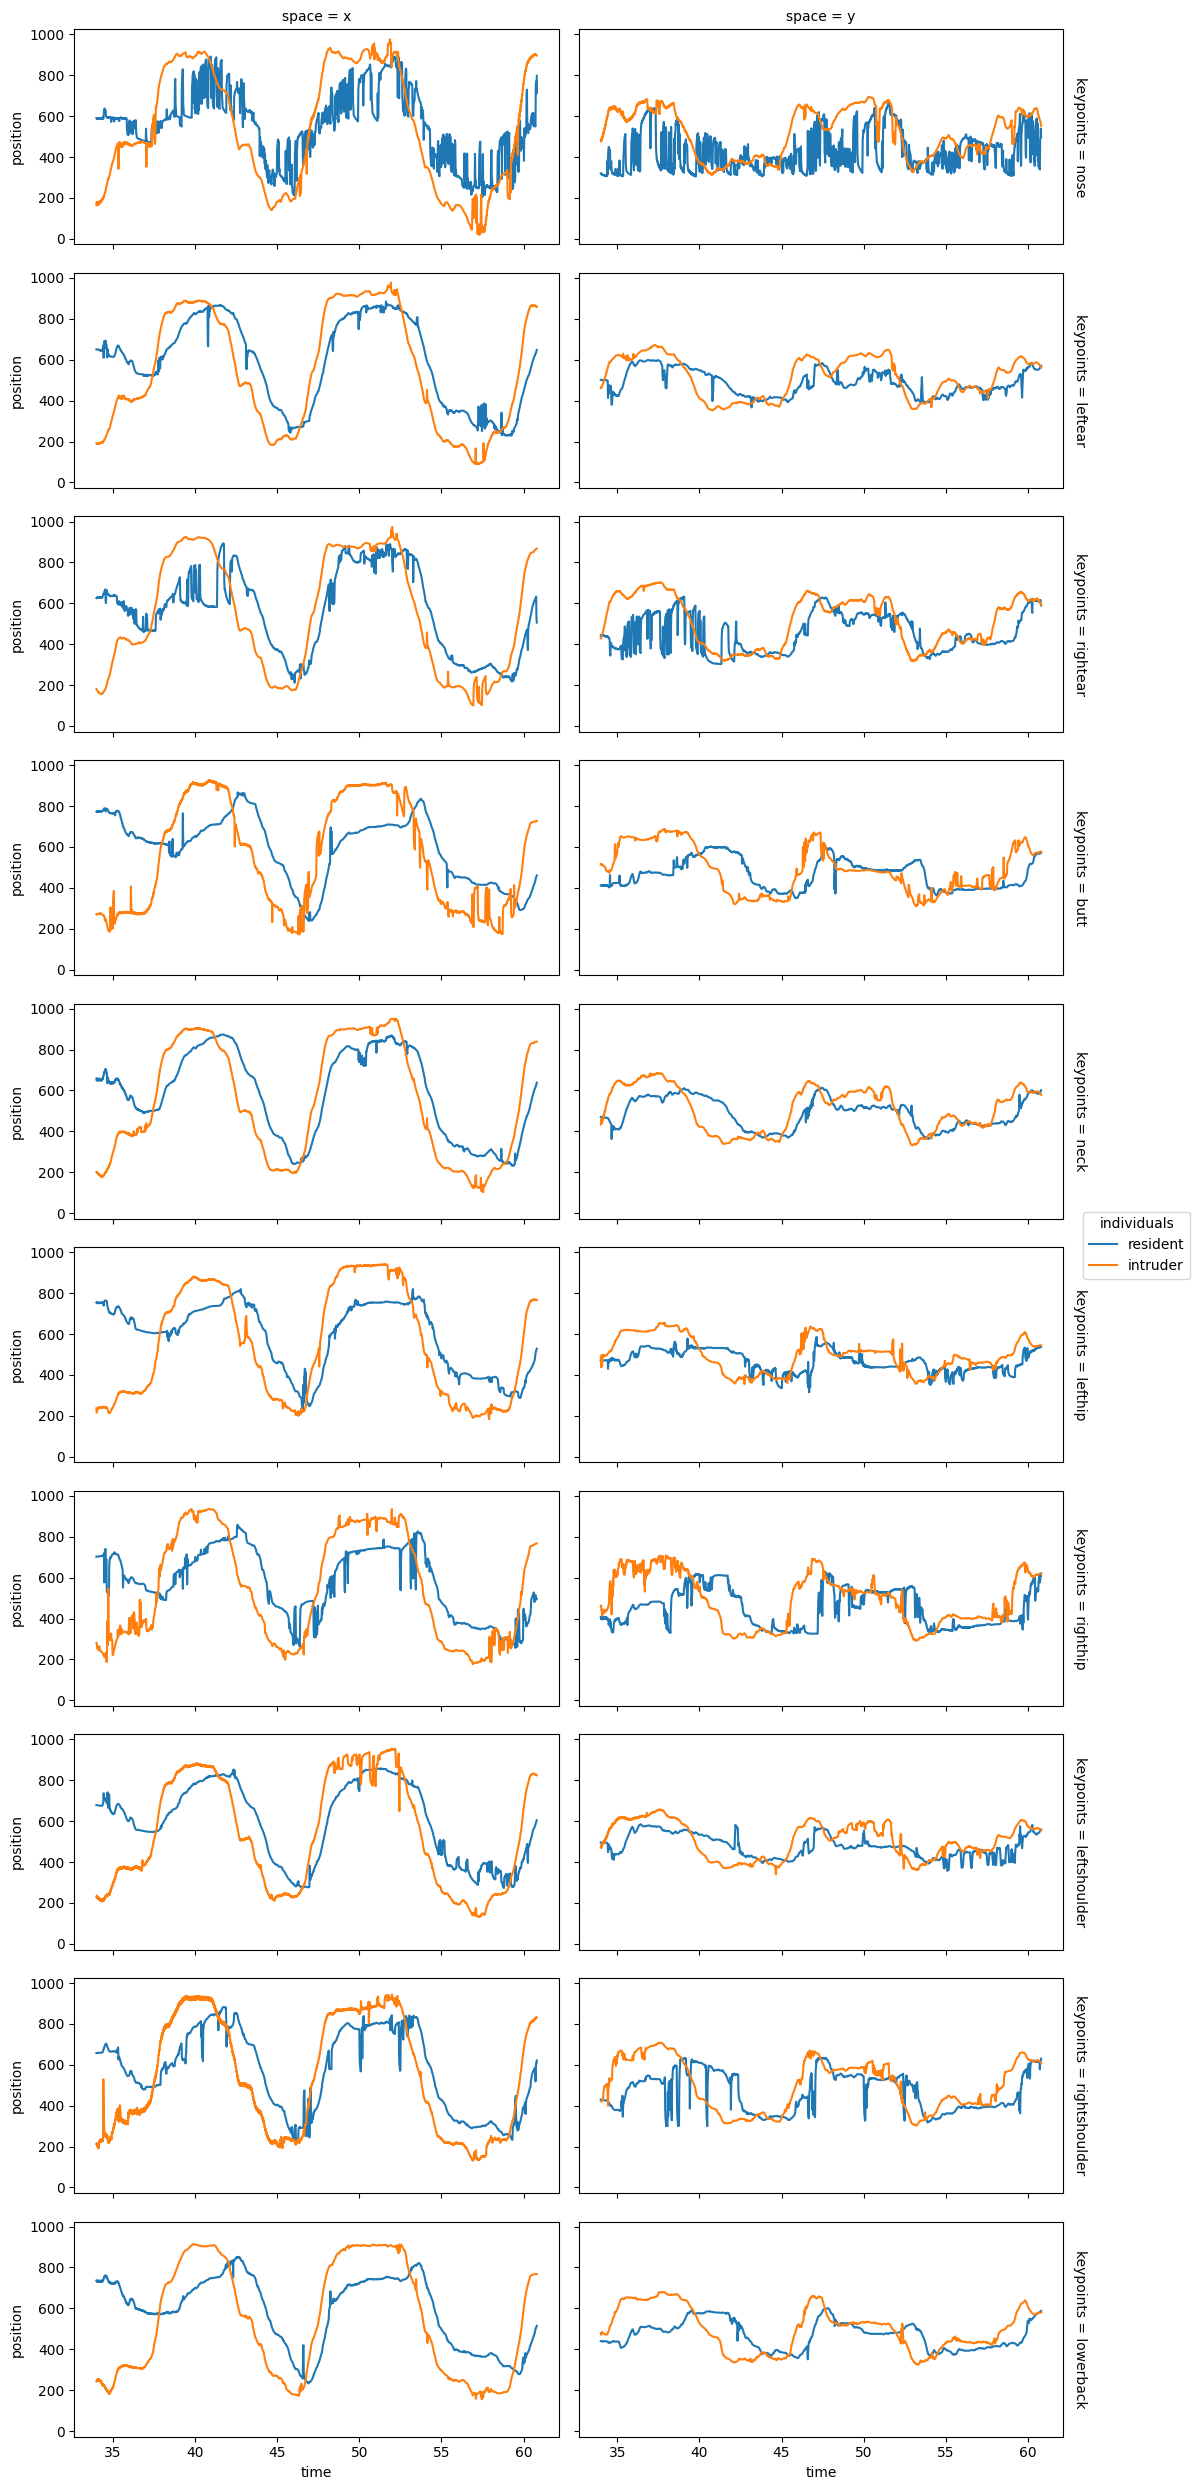

In [75]:
position.plot.line(x="time", row="keypoints",  hue="individuals", col="space", aspect=2, size=2.5)

Plotting **confidence** data with xarray for all individuals and keypoints

In [76]:
confidence = ds_new.confidence
confidence

<xarray.DataArray 'confidence' (time: 1341, individuals: 2, keypoints: 10)> Size: 215kB
0.3416 0.3254 0.9026 0.9968 0.9542 0.9167 ... 0.9974 0.8268 0.9805 0.4482 0.9966
Coordinates:
  * time         (time) float64 11kB 34.0 34.02 34.04 34.06 ... 60.76 60.78 60.8
  * individuals  (individuals) <U8 64B 'resident' 'intruder'
  * keypoints    (keypoints) <U13 520B 'nose' 'leftear' ... 'lowerback'

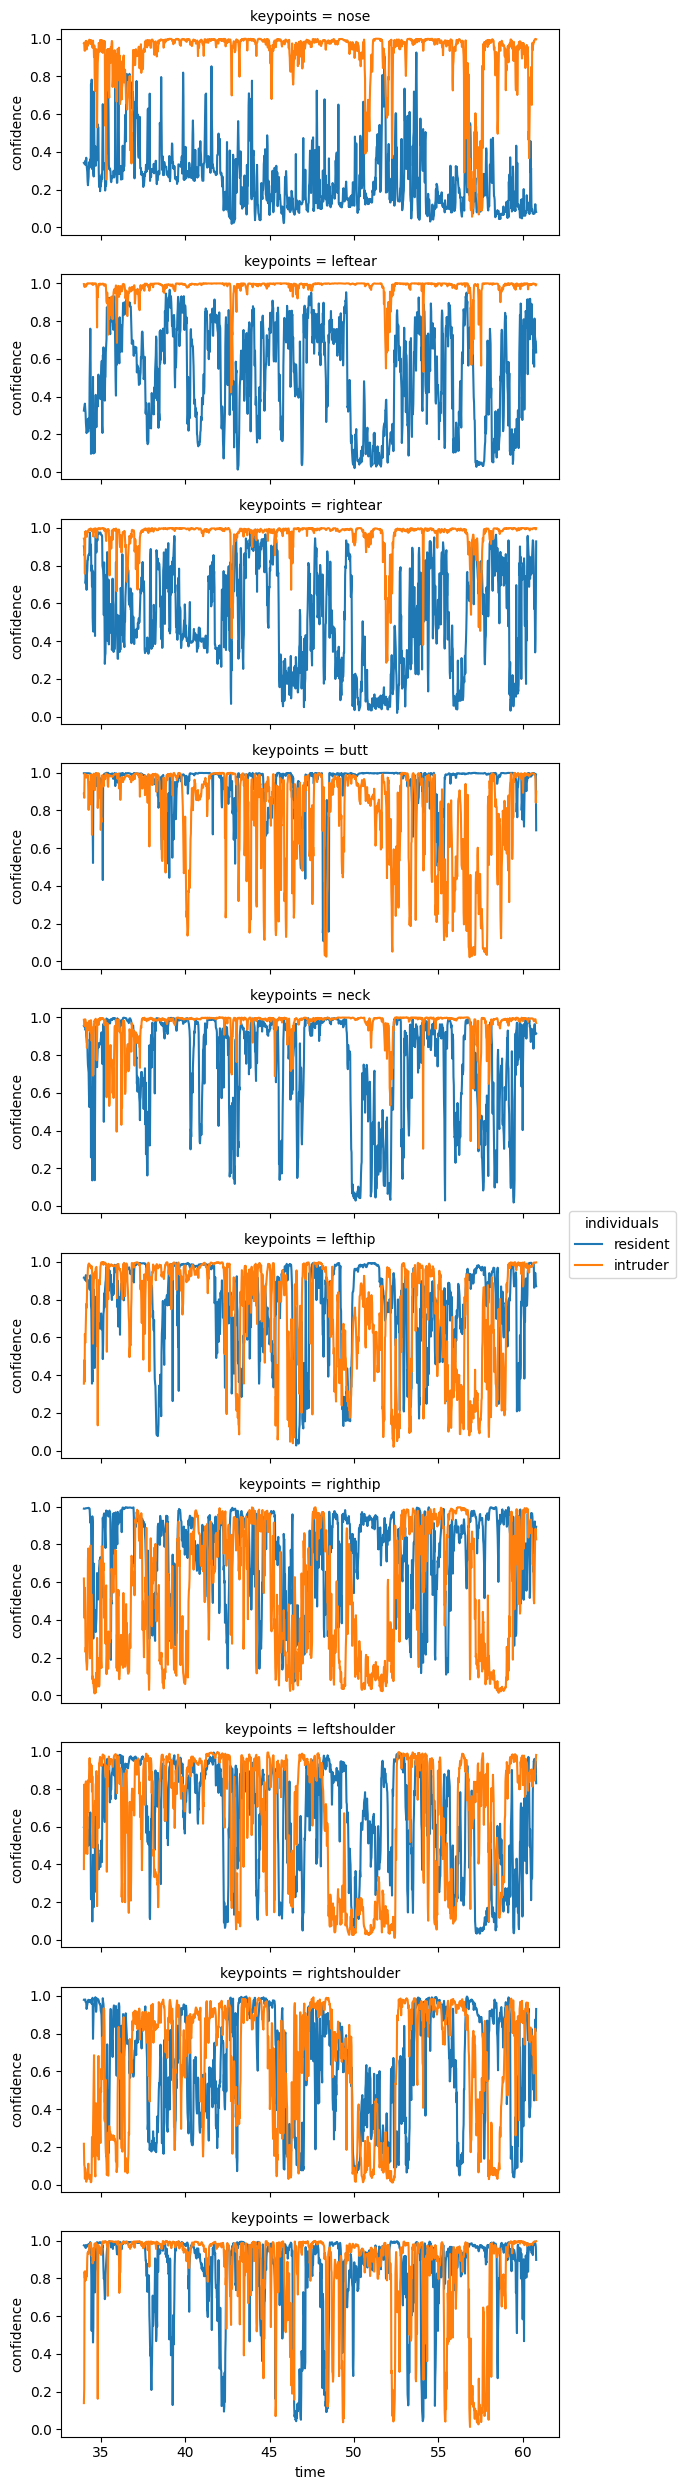

In [77]:
confidence.plot.line(x="time", row="keypoints",  hue="individuals", aspect=2, size=2.5)